In [1]:
#!python -m pip install git+https://github.com/fastai/fastai.git

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df1 = pd.read_csv('banknifty_train_csv.csv')
df2 = pd.read_csv('banknifty_test_csv.csv')
df_frame = [df1,df2]
df = pd.concat(df_frame)
#print the head
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover
16,2018-10-25,24841.50,24977.35,24696.85,24817.45,215033794.0,6.855910e+10
17,2018-10-26,24771.85,24771.95,24353.10,24421.05,219130974.0,5.370590e+10
18,2018-10-29,24647.95,25023.75,24404.55,24959.70,279844102.0,8.145830e+10
19,2018-10-30,24924.75,25121.50,24686.85,24807.75,257591034.0,6.320860e+10
20,2018-10-31,24823.80,25201.30,24528.35,25153.25,241789641.0,6.831520e+10


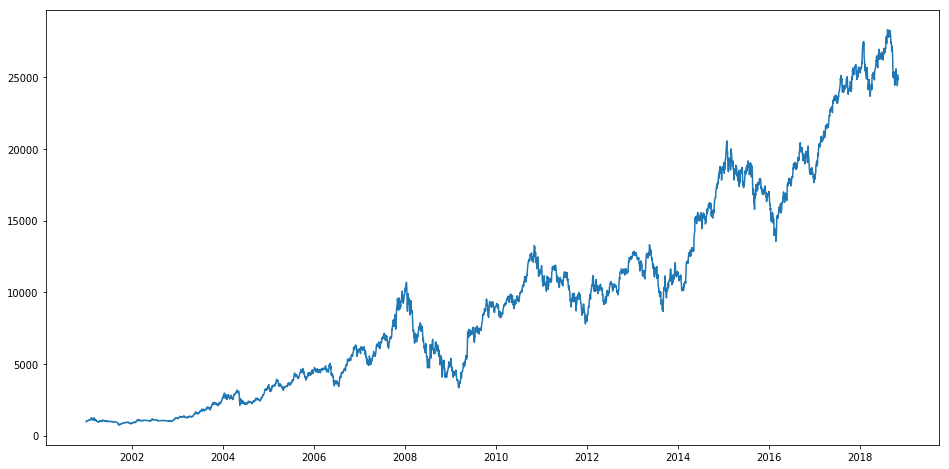

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [3]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [4]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
#splitting into train and validation
upto =len(new_data)-248

print(upto)
train = new_data[:upto]
valid = new_data[upto:]

4191


In [5]:
new_data.shape, train.shape, valid.shape

((4439, 1), (4191, 1), (248, 1))

In [6]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [13]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM






Using TensorFlow backend.


In [7]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [8]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
upto =len(new_data)-248
print(upto)
train = dataset[0:upto,:]
valid = dataset[upto:,:]

4191


In [10]:
#converting dataset into x_train and y_train
no_of_days =15
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)-no_of_days):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i+no_of_days,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
one =np.reshape(x_train, (x_train.shape[0],x_train.shape[1]))
print(one.shape)
test_df = pd.DataFrame(one)
test_df["y"] = y_train
print(test_df.iloc[:,59:])

(4116, 60)
            59         y
0     0.010274  0.010727
1     0.010710  0.010777
2     0.010777  0.010653
3     0.008986  0.010641
4     0.007853  0.010753
5     0.008223  0.009184
6     0.008208  0.009032
7     0.008149  0.009737
8     0.008386  0.009412
9     0.007989  0.010180
10    0.008483  0.011042
11    0.007965  0.011198
12    0.008785  0.010788
13    0.009943  0.012043
14    0.010879  0.011446
15    0.011170  0.011864
16    0.010727  0.011593
17    0.010777  0.011485
18    0.010653  0.011922
19    0.010641  0.011513
20    0.010753  0.011099
21    0.009184  0.010745
22    0.009032  0.010968
23    0.009737  0.010933
24    0.009412  0.010412
25    0.010180  0.010813
26    0.011042  0.011412
27    0.011198  0.010761
28    0.010788  0.010547
29    0.012043  0.010057
...        ...       ...
4086  0.853287  0.881307
4087  0.857019  0.881113
4088  0.848020  0.878339
4089  0.854538  0.872327
4090  0.854890  0.856719
4091  0.859082  0.849329
4092  0.851933  0.850566
4093  0.855249

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 799s - loss: 0.0014


In [15]:
closing_price

array([[23978.035],
       [24117.084],
       [24229.799],
       [24355.527],
       [24440.19 ],
       [24444.195],
       [24402.55 ],
       [24374.871],
       [24393.736],
       [24393.715],
       [24376.75 ],
       [24346.09 ],
       [24361.188],
       [24437.512],
       [24521.938],
       [24590.213],
       [24641.434],
       [24670.375],
       [24694.48 ],
       [24732.06 ],
       [24755.502],
       [24760.88 ],
       [24671.918],
       [24551.273],
       [24422.98 ],
       [24328.852],
       [24212.076],
       [24155.996],
       [24177.615],
       [24233.156],
       [24235.78 ],
       [24202.494],
       [24197.39 ],
       [24250.76 ],
       [24337.63 ],
       [24439.39 ],
       [24500.207],
       [24530.61 ],
       [24562.574],
       [24591.209],
       [24578.297],
       [24556.213],
       [24544.166],
       [24494.652],
       [24450.742],
       [24412.727],
       [24412.135],
       [24448.014],
       [24501.012],
       [24553.59 ],


In [16]:
len(valid)

248

In [21]:

valid = new_data[upto:]
val =len(new_data[upto:])
#valid = new_data[upto+3:]
#valid = valid.iloc[no_of_days:val+1]
print(valid.shape)
print(closing_price[:len(closing_price)-no_of_days].shape)
valid['Predictions'] =0
#valid['Predictions'] = closing_price[:len(closing_price)-no_of_days]
valid['Predictions'] = closing_price
#print(valid.shape)
valid
      

(248, 1)
(233, 1)


/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Close,Predictions
Date,,
2017-11-01,25490.5,23978.035156
2017-11-02,25427.3,24117.083984
2017-11-03,25650.7,24229.798828
2017-11-06,25571.2,24355.527344
2017-11-07,25300.8,24440.189453
2017-11-08,25184.3,24444.195312
2017-11-09,25291.3,24402.550781
2017-11-10,25499,24374.871094
2017-11-13,25358.3,24393.736328


In [19]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(valid['Predictions'])),2)))
rms

1473.8757131350594

In [93]:
valid.columns



Index(['Close', 'Predictions'], dtype='object')

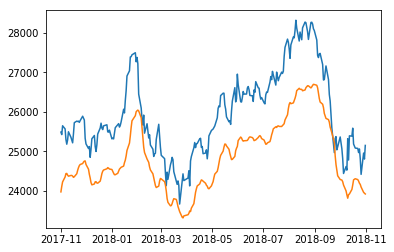

In [22]:
#for plotting
#dataset = new_data.values
#upto =len(new_data)-248
#print(upto)
#train = new_data[:upto]
#valid = new_data[upto:]

#plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [24]:
from keras.models import model_from_json
import os
symbol = "BANKNIFTY_15"

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(symbol+".h5")
print("Saved model to disk")


Saved model to disk


Loaded model from disk
248
[[0.8661857 ]
 [0.87174445]
 [0.8762631 ]
 [0.88129187]
 [0.8846502 ]
 [0.88469106]
 [0.88282126]
 [0.88152766]
 [0.882222  ]
 [0.8822775 ]
 [0.8816934 ]
 [0.8805576 ]
 [0.8812751 ]
 [0.8845175 ]
 [0.88813037]
 [0.8910566 ]
 [0.89321035]
 [0.8943795 ]
 [0.8952969 ]
 [0.89675266]
 [0.8976589 ]
 [0.8978419 ]
 [0.8941836 ]
 [0.88918823]
 [0.88389844]
 [0.8800681 ]
 [0.87542194]
 [0.87328666]
 [0.87437445]
 [0.8768923 ]
 [0.877229  ]
 [0.8759675 ]
 [0.87572604]
 [0.87783206]
 [0.8813372 ]
 [0.88547003]
 [0.8879197 ]
 [0.88905776]
 [0.89020294]
 [0.8912152 ]
 [0.8905633 ]
 [0.88954693]
 [0.8889752 ]
 [0.88693565]
 [0.8851426 ]
 [0.8836269 ]
 [0.88366973]
 [0.885243  ]
 [0.8875383 ]
 [0.88979846]
 [0.8908916 ]
 [0.89173484]
 [0.8929329 ]
 [0.8964086 ]
 [0.89899975]
 [0.9032801 ]
 [0.90892285]
 [0.91658086]
 [0.92409176]
 [0.9326009 ]
 [0.9394403 ]
 [0.94462293]
 [0.9484724 ]
 [0.94920504]
 [0.94973075]
 [0.9487247 ]
 [0.94160724]
 [0.9317545 ]
 [0.92097795]
 [0.911